In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [3]:
# importing data from folder
main_folder = 'C://Users//Agam//Project//Machine-Learning//Untitled Folder//data//'
train = pd.read_csv(main_folder + 'train.csv')
test = pd.read_csv(main_folder + 'test.csv')
store = pd.read_csv(main_folder + 'stores.csv')
features = pd.read_csv(main_folder + 'features.csv')

In [12]:
# visualzing the data
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [26]:
# we can see that the store and date is same in features and train table we can merge this tables and we are performing inner join
df = pd.merge(train, features, on = ['Store', 'Date'], how = 'inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [32]:
# Now need to convert string date into datatime obj
from datetime import datetime as dt
df['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(df['Date'])]
df['DateTimeObj'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: DateTimeObj, dtype: datetime64[ns]

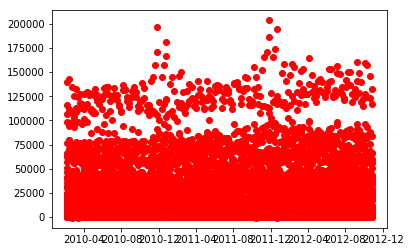

In [36]:
#plotting wher x is date time obj and y is weekly sales for store is 1
plt.plot(df[(df.Store == 1)].DateTimeObj, df[(df.Store == 1)].Weekly_Sales, 'ro')
plt.show()

In [37]:
# here we added all weekly sales for each date 
weekly_sales = df.groupby(['Store', 'Date'])['Weekly_Sales'].apply(lambda x: np.sum(x))
weekly_sales.head()

Store  Date      
1      2010-02-05    1643690.90
       2010-02-12    1641957.44
       2010-02-19    1611968.17
       2010-02-26    1409727.59
       2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

In [38]:
# here we add all weekly sales of each store and department
weeklysalesdept = df.groupby(['Store', 'Dept'])['Weekly_Sales'].apply(lambda x : np.sum(x))
weeklysalesdept.head()

Store  Dept
1      1       3219405.18
       2       6592598.93
       3       1880518.36
       4       5285874.09
       5       3468885.58
Name: Weekly_Sales, dtype: float64

In [40]:
# As weekly sales have 1 stored only at index 0
weeklyscale = weekly_sales.reset_index()
print(weeklyscale[:5])

   Store        Date  Weekly_Sales
0      1  2010-02-05    1643690.90
1      1  2010-02-12    1641957.44
2      1  2010-02-19    1611968.17
3      1  2010-02-26    1409727.59
4      1  2010-03-05    1554806.68


In [42]:
# we will join the weekly scale and features table based on store and row key
walmart = pd.merge(weeklyscale, features, on = ['Store', 'Date'], how = 'inner')
walmart.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [43]:
# here we see that mark down tables contains NaN entries we need to drop it
walmart.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1, inplace = True)

In [44]:
walmart.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,211.350143,8.106,False


In [46]:
# need to datetimeobj to walmart
walmart['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(walmart['Date'])]
weekno = walmart.reset_index()


In [58]:
# will add week in order to that 
walmart['Week'] = [(x - walmart['DateTimeObj'][0]) /7 for x in list(walmart['DateTimeObj'])]
walmart.head()


,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown5,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,211.096358,8.106,False,2010-02-05,0 days
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,211.242170,8.106,True,2010-02-12,1 days
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,211.289143,8.106,False,2010-02-19,2 days
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,211.319643,8.106,False,2010-02-26,3 days
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,211.350143,8.106,False,2010-03-05,4 days


In [68]:
# we can see that in week column it contains days at each row we need to remove in order to do that we do the following
walmart['Week'] = [np.timedelta64(x, 'D').astype(int) for x in walmart['Week']]

In [69]:
# next we see that the the is holiday column contains boolean we need to convert into int
walmart['IsHoliday'] = [int(x) for x in list(walmart['IsHoliday'])]
walmart.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,0,2010-02-05,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,1,2010-02-12,1
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,0,2010-02-19,2
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,0,2010-02-26,3
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,0,2010-03-05,4


In [70]:
walmart.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [71]:
# we split the walmart record in train and test data
train_wm, test_wm = train_test_split(walmart, test_size = 0.3, random_state = 42)

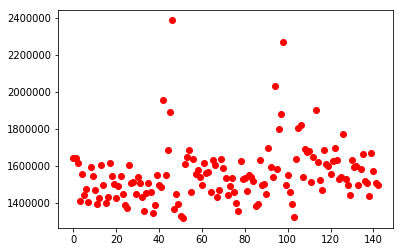

In [72]:
#plotting the record where x is week and y is weekly sales
plt.plot(walmart[(walmart.Store == 1)].Week, walmart[(walmart.Store == 1)].Weekly_Sales, 'ro' )
plt.show()

In [73]:
walmart.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,0,2010-02-05,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,1,2010-02-12,1
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,0,2010-02-19,2
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,0,2010-02-26,3
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,0,2010-03-05,4


In [75]:
XTrain  = train_wm[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHoliday']]
YTrain = train_wm['Weekly_Sales']

XTest = test_wm[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHoliday']]
YTest = test_wm['Weekly_Sales']


In [76]:
# fit the linear model 
wmlinear = linear_model.LinearRegression(normalize = True)
wmlinear.fit(XTrain, YTrain)
wmlinear.score(XTest, YTest)

0.018399963104079542

In [80]:
# the score we got after linear regression we need to improve that 
#as we see that the in store column the records are 1,2, and so instead of doing that we can make one hot encoder 
store_dummies = pd.get_dummies(walmart.Store, prefix='Store').iloc[:,1:]
walmart = pd.concat([walmart, store_dummies], axis = 1)
store_dummies.head()

,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
train_WM, test_WM = train_test_split(walmart, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmart.shape[1]))]
yTrain = train_WM.Weekly_Sales
                                                    
XTest = test_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmart.shape[1]))]
yTest=test_WM.Weekly_Sales

In [83]:

wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)
wmLinear.score(XTest, yTest )

0.915987610753601